### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import os
import pandas as pd
import numpy as np
import piplite
await piplite.install('seaborn')
await piplite.install('plotly')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
%reload_ext autoreload
%autoreload 2
   
sns.set_theme(style="darkgrid")

# What's the current working directory?
filepath = os.getcwd()
print(filepath)

# Change Working Directory to Jupiter /data
#os.chdir("/drive/data/")
#print(filepath)

/drive/data/Module 5


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('/drive/data/coupons.csv')

In [3]:
# understanding the dataset
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
# Overview of the dataset collums (for non-null values)
data.info()

In [ ]:
# understanding the dataset statistics
data.describe()

In [ ]:
# How many null values present in the dataset?
data.isnull().sum()

3. Decide what to do about your missing data -- drop, replace, other...

In [4]:
# dropping the "car" column since it is mostly empty.
data = data.drop('car', axis = 1)
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [5]:
# dropping the "null values" rows.
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [ ]:
data.describe()

In [6]:
# Replacing "1" and "0" from the "Y" column with "accepted" and "declined" respectively for ease of reading
data['Y'] = data['Y'].replace(1, "accepted")
data['Y'] = data['Y'].replace(0, "declined")
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,accepted
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,declined
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,accepted
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,declined
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,declined


In [ ]:
#sns.pairplot(data_without_nulls)

4. What proportion of the total observations chose to accept the coupon? 



In [ ]:
data['Y'].value_counts()

Proportion of the total observations chose to accept the coupon: 0.57


<AxesSubplot:xlabel='Y', ylabel='Count'>

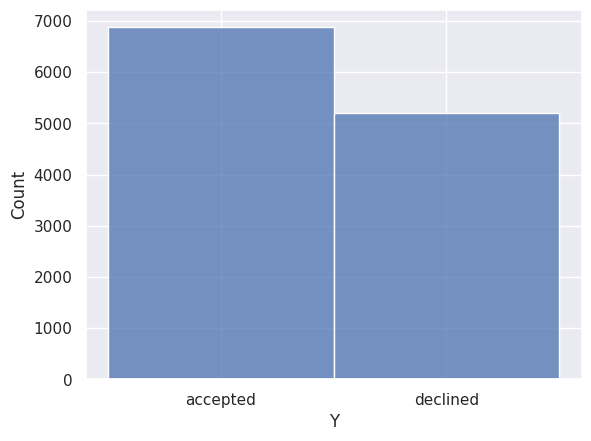

In [8]:
#converting the Y column from integer to string
#data['Y'] = data['Y'].astype("str").str.strip()
#data['Y'].value_counts()["accepted"]

#total_number_of_Y = converted_Y.count()
#Portion_of_total = data["Y"].value_counts()["accepted"] / data['Y'].count()
Portion_of_total = data["Y"].value_counts()["accepted"] / len(data['Y'])
print("Proportion of the total observations chose to accept the coupon:", round(Portion_of_total,2)) 

#Graphical representation:
sns.histplot(data['Y'])

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:ylabel='coupon'>

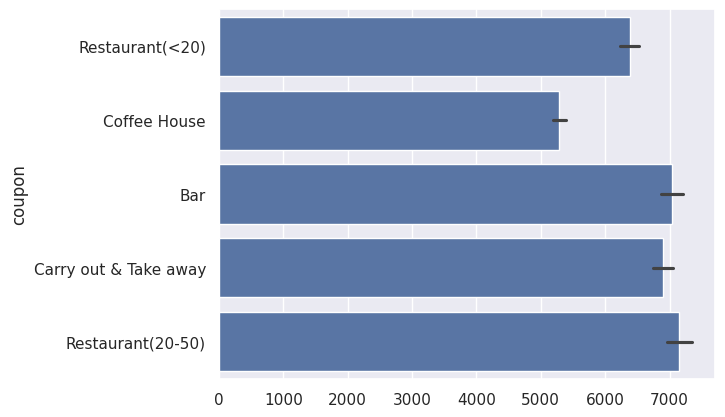

In [9]:
# seaborn bar plot of column coupon
sns.barplot(data["coupon"]) 

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

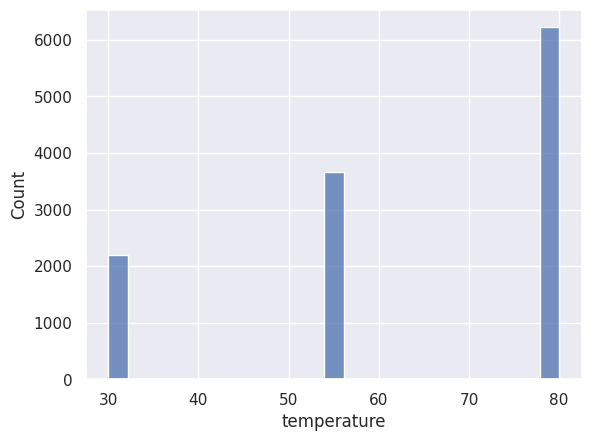

In [10]:
# Temperature visualization
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
# Creating a dataframe containing just bar coupons.
bar = None
bar = data[data["coupon"].str.contains("Bar")]
bar["age"] = pd.to_numeric(bar["age"], errors='coerce').astype('Int64')
bar.info()

<ipython-input-18-ff89fdbb9738>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar["age"] = pd.to_numeric(bar["age"], errors='coerce').astype('Int64')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1559 non-null   Int64 
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

<AxesSubplot:xlabel='Bar', ylabel='Count'>

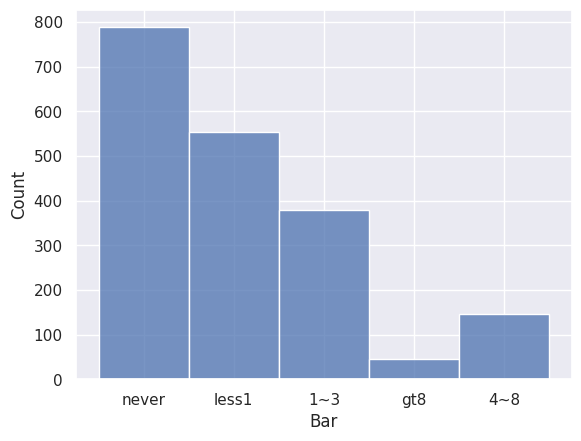

In [19]:
sns.histplot(bar["Bar"])

2. What proportion of bar coupons were accepted?


Total bar coupons issued:
1913
Bar coupons declined and accepted count:
declined    1125
accepted     788
Name: Y, dtype: int64


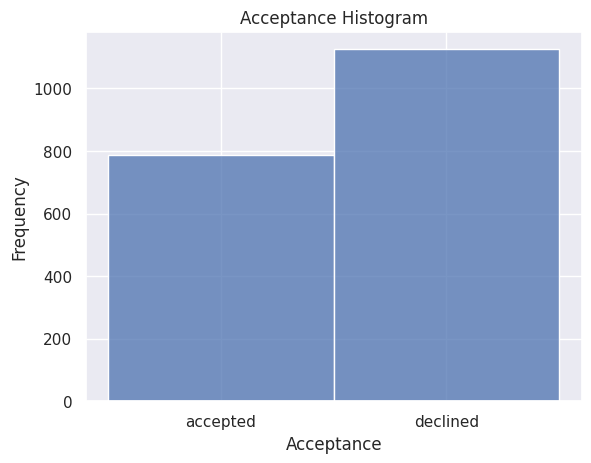

In [20]:
#printing the bar coupons Y count and acceptance/decline values
print("Total bar coupons issued:", end="\n")
print(len(bar["Y"]))
print("Bar coupons declined and accepted count:",end="\n") 
print(bar["Y"].value_counts())

#graphical representation
sns.histplot(bar["Y"])
plt.title("Acceptance Histogram")
plt.xlabel("Acceptance")
plt.ylabel("Frequency")
plt.show()

In [21]:
#total_number_of_Y = converted_Y.count()
Propotion_of_bar_coupons_accepted = bar["Y"].value_counts()["accepted"] / len(bar['Y'])
print("Proportion of the total observations chose to accept the coupon:", round(Propotion_of_bar_coupons_accepted, 2)) 


Proportion of the total observations chose to accept the coupon: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [53]:
#count of how many times those who went to a bar 3 or fewer times a month accepted the coupon
count1 = len(bar.query("Bar in ['never', 'less1', '1~3'] and Y == 'accepted'"))
print("3 and fewer times a month acceted the coupon:", count1)

#count of how many times those who went to a bar more than 3 times a month accepted the coupon
count2 = len(bar.query("Bar in ['4~8', 'gt8'] and Y == 'accepted'"))
print("more than 3 times a month acceted the coupon:", count2)

#Comparing the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
fewer_3_acceptance_rate = len(bar.query("Bar in ['never', 'less1', '1~3'] and Y == 'accepted'")) / len(bar.query("Y == 'accepted'"))
greater_3_acceptance_rate = len(bar.query("Bar in ['4~8', 'gt8'] and Y == 'accepted'")) / len(bar.query("Y == 'accepted'"))
print("Acceptance rate between those who went to a bar 3 or fewer:", round(fewer_3_acceptance_rate, 2))
print("Acceptance rate between those who went to a bar more than 3 times:", round(greater_3_acceptance_rate, 2))


3 and fewer times a month acceted the coupon: 641
more than 3 times a month acceted the coupon: 147
Acceptance rate between those who went to a bar 3 or fewer: 0.81
Acceptance rate between those who went to a bar more than 3 times: 0.19


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [51]:
# calculating the acceptance rate for between drivers who go to a bar more than once a month and are over the age of 25 
#ans4a = len(bar.query("Bar in ['1~3', '4~8', 'gt8'] and age > 25 and Y == 'accepted'")) / len(bar["Y])
ans4a = len(bar.query("Bar in ['1~3', '4~8', 'gt8'] and age > 25 and Y == 'accepted'")) / len(bar.query("Y == 'accepted'"))
print("The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25:", round(ans4a, 2))

# calculating the acceptance rate for between all other drivers 
ans4b = len(bar.query("Bar in ['never', 'less1'] and age < 25 and Y == 'accepted'")) / len(bar.query("Y == 'accepted'"))
print("The acceptance rate of all others:", round(ans4b,2))

The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25: 0.3
The acceptance rate of all others: 0.11


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [55]:
#The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is:
ans5 = len(bar.query("Bar in ['1~3', '4~8', 'gt8'] and passanger != 'kids' and occupation not in ['farming', 'fishing', 'forestry']")) / len(bar.query("Y == 'accepted'"))
print("The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming," 
       "fishing, or forestry is:", round(ans5, 2))

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming,fishing, or forestry is: 0.73


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [45]:
len(bar.query("Bar in ['1~3', '4~8', 'gt8'] and age < 25 and Y == 'accepted'")) 

110

In [ ]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
#go to bars more than once a month and are under the age of 30 OR
#go to cheap restaurants more than 4 times a month and income is less than 50K.

In [43]:
# The acceptance rate for drivers who meets all the conditions stated in question #6

ans6b = len(bar.query("(Bar in ['1~3', '4~8', 'gt8'] and passanger != 'kids' and maritalStatus != 'Widowed') or (Bar in ['1~3', '4~8', 'gt8'] and age < 30) or (RestaurantLessThan20 in ['4~8', 'gt8'] and income in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])")) / len(bar['Y'])
print("The acceptance rate for drivers who meets all the conditions stated in question #6 is:", round(ans6b, 2))

The acceptance rate for drivers who meets all the conditions stated in question #6 is: 0.41


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
As seen the data above:
- A total of 1913 bar coupons were issued:
      - Declined:    1125
      - Accepted:    788
- Drivers declined bar coupons more than accepted them. 
- Drivers who go to bar 3 and fewer times a month accepted the coupon 641 times vs 147 times for those who go more than 3 times a month. 
- Drivers within the $25000 - 37400 income bracket accepted the bar coupons the most.
- Drivers without kids in the car was most likely to accept the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
Investigating the acceptance rate for coffee house.

In [58]:
coffeehouse = None
coffeehouse = data[data["coupon"].str.contains("Coffee House")]
coffeehouse["age"] = pd.to_numeric(coffeehouse["age"], errors='coerce').astype('Int64')
coffeehouse.info()

<ipython-input-58-5f0e8572269d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffeehouse["age"] = pd.to_numeric(coffeehouse["age"], errors='coerce').astype('Int64')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3144 non-null   Int64 
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null 

<AxesSubplot:xlabel='CoffeeHouse', ylabel='Count'>

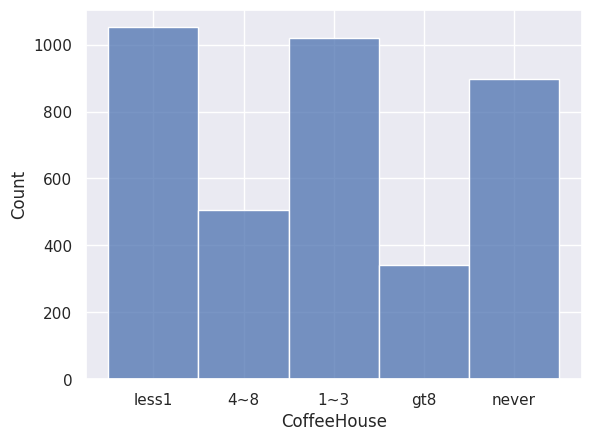

In [60]:
sns.histplot(coffeehouse["CoffeeHouse"])

Total bar coupons issued:
3816
CoffeeHouse coupons declined and accepted count:
declined    1922
accepted    1894
Name: Y, dtype: int64


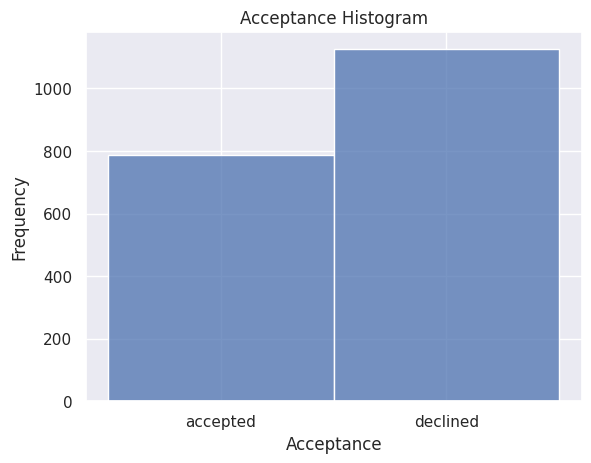

In [67]:
#printing the bar coupons Y count and acceptance/decline values
print("Total bar coupons issued:", end="\n")
print(len(coffeehouse["Y"]))
print("CoffeeHouse coupons declined and accepted count:",end="\n") 
print(coffeehouse["Y"].value_counts())

#graphical representation
sns.histplot(bar["Y"])
plt.title("Acceptance Histogram")
plt.xlabel("Acceptance")
plt.ylabel("Frequency")
plt.show()

In [68]:
# Proportion of the total observations chose to accept the coupon
Propotion_of_coffeehouse_coupons_accepted = coffeehouse["Y"].value_counts()["accepted"] / len(coffeehouse['Y'])
print("Proportion of the total observations chose to accept the coupon:", round(Propotion_of_coffeehouse_coupons_accepted, 2)) 

Proportion of the total observations chose to accept the coupon: 0.5


In [83]:
#count of how many times those who went to a bar 3 or fewer times a month accepted the coupon
count1 = len(coffeehouse.query("CoffeeHouse in ['never', 'less1', '1~3'] and Y == 'accepted'"))
print("3 and fewer times a month acceted the coupon:", count1)

#count of how many times those who went to a bar more than 3 times a month accepted the coupon
count2 = len(coffeehouse.query("CoffeeHouse in ['4~8', 'gt8'] and Y == 'accepted'"))
print("more than 3 times a month acceted the coupon:", count2)

#Comparing the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
fewer_3_acceptance_rate = len(coffeehouse.query("CoffeeHouse in ['never', 'less1', '1~3'] and Y == 'accepted'")) / len(coffeehouse.query("Y == 'accepted'"))
greater_3_acceptance_rate = len(coffeehouse.query("CoffeeHouse in ['4~8', 'gt8'] and Y == 'accepted'")) / len(coffeehouse.query("Y == 'accepted'"))
print("Acceptance rate between those who went to a coffee house 3 or fewer:", round(fewer_3_acceptance_rate, 2))
print("Acceptance rate between those who went to a coffee house more than 3 times:", round(greater_3_acceptance_rate, 2))

3 and fewer times a month acceted the coupon: 1323
more than 3 times a month acceted the coupon: 571
Acceptance rate between those who went to a coffee house 3 or fewer: 0.7
Acceptance rate between those who went to a coffee house more than 3 times: 0.3


The aceptance rate by age is: age
21    0.23
26    0.22
31    0.15
36    0.09
41    0.08
46    0.06
Name: accepted, dtype: float64


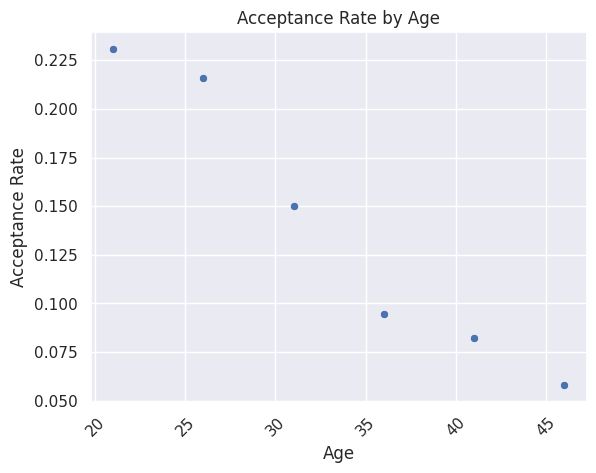

In [141]:
# Calculate acceptance rate for each age group
acceptance_rates = coffeehouse.groupby('age')['Y'].value_counts().unstack()['accepted']/len(coffeehouse.query("Y == 'accepted'"))
print("The aceptance rate by age is:", round(acceptance_rates, 2))

# Plotting
sns.scatterplot(x=acceptance_rates.index, y=acceptance_rates.values)
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Age')
# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.show()

The aceptance rate by marital status is: maritalStatus
Divorced             0.04
Married partner      0.38
Single               0.41
Unmarried partner    0.17
Widowed              0.01
Name: accepted, dtype: float64


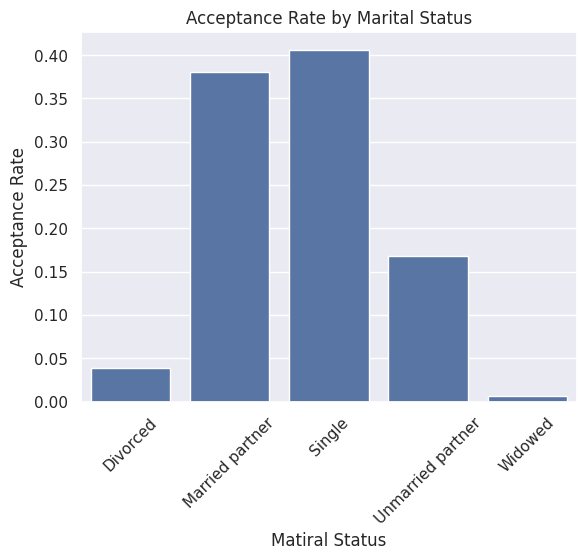

In [138]:
# Calculate acceptance rate for each age group
acceptance_rates = coffeehouse.groupby("maritalStatus")['Y'].value_counts().unstack()['accepted'] / len(coffeehouse.query("Y == 'accepted'"))
print("The aceptance rate by marital status is:", round(acceptance_rates, 2))

# Plotting
sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values)
plt.xlabel('Matiral Status')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Marital Status')
# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.show()

The aceptance count by gender is: gender
Female    0.51
Male      0.49
Name: accepted, dtype: float64


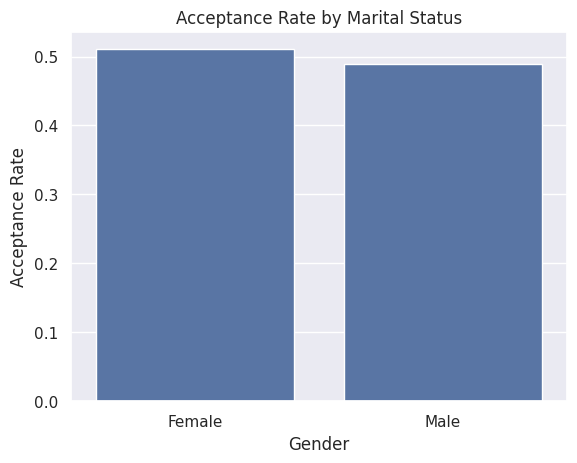

In [139]:
# Calculate acceptance rate for each age, marital status, and gender group
acceptance_rates = coffeehouse.groupby(['gender'])['Y'].value_counts().unstack()['accepted'] / len(coffeehouse.query("Y == 'accepted'"))
print("The aceptance count by gender is:", round(acceptance_rates, 2))

# Plotting
sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values)
plt.xlabel('Gender')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Marital Status')
# Rotate x-axis ticks

plt.show()

In [137]:
# Calculate acceptance rate for each age, marital status, and gender group
acceptance_rates = coffeehouse.groupby(['age', 'maritalStatus', 'gender'])['Y'].value_counts().unstack()['accepted'] / len(coffeehouse.query("Y == 'accepted'"))
print("Acceptance rate by age, marital status and gender is: \n", round(acceptance_rates, 3))
# Reset index to make 'age', 'marital_status', and 'sex' regular columns
acceptance_rates = acceptance_rates.reset_index()




Acceptance rate by age, marital status and gender is: 
 age  maritalStatus      gender
21   Married partner    Female    0.037
                        Male      0.005
     Single             Female    0.043
                        Male      0.095
     Unmarried partner  Female    0.030
                        Male      0.020
26   Married partner    Female    0.031
                        Male      0.039
     Single             Female    0.049
                        Male      0.053
     Unmarried partner  Female    0.031
                        Male      0.013
31   Married partner    Female    0.052
                        Male      0.032
     Single             Female    0.022
                        Male      0.022
     Unmarried partner  Female    0.013
                        Male      0.006
     Divorced           Female    0.003
36   Married partner    Female    0.018
                        Male      0.030
     Single             Female    0.006
                        Male     

In [136]:
# Calculate acceptance rate for marital status, and gender group by weather
acceptance_rates = coffeehouse.groupby(['weather', 'gender'])['Y'].value_counts().unstack()['accepted'] / len(coffeehouse.query("Y == 'accepted'"))
print("The effects of weather gender's acceptance of coffee house coupon is:\n", round(acceptance_rates, 3))
# Reset index to make 'weather', 'marital_status', and 'sex' regular columns
acceptance_rates = acceptance_rates.reset_index()

The effects of weather gender's acceptance of coffee house coupon is:
 weather  gender
Rainy    Female    0.029
         Male      0.030
Snowy    Female    0.031
         Male      0.033
Sunny    Female    0.451
         Male      0.426
Name: accepted, dtype: float64


In [ ]:
Observations:
- Total bar coupons issued was 3816
   - 1894 accepted
   - 1922 declined
- Females acceptance rate was higher than male 
   - Acceptance rate was 0.51 for female Vs 0.49 acceptance rate for males
- Acceptance rate for females was higher when sorted by marital status, age and sex compared to males
- The acceptance count by marital status was the highest for singles (0.41), followed by married with partner (0.38), unmarried with partner (0.17), divorced (0.04) and lastly widowed (0.01)
- The acceptance rate was inversely proportional with age
- When it comes to rainy and snowy days male slightly consumed more coffee (statically miniscule) while on sunny days females drink more coffee.
